In [ ]:
#Hi back

In [1]:
#Hi

In [3]:
# MCPath for the min of thre (S1, S2, S3, s1, s2, s3, rho1, rho2, T, r, dt)
def MC(S1, S2, S3, s1, s2, s3, rho1, T, r, dt = 1/252):
    Xt1 = S1
    n = int(round(T/dt,0))
    r_dt = r * dt
    s1_sqrt_dt = s1 * np.sqrt(dt)
    sims1 = np.zeros(n+1)
    sims1[0] = S0
    for i in range(n):
        dz = np.random.normal(0,1)
        sims1[i+1] = sims1[i] * (1+(r_dt + s1_sqrt_dt * dz))
    return sims1

In [5]:
import numpy as np

In [9]:
import matplotlib.pyplot as plt

In [14]:
#function: generates 3 correlated normal variables
def MCCorrV(m1,m2,m3,p12, p13, p23 , s1, s2, s3,n):
    mean = [m1, m2, m3]
    corr = [[1, p12, p13], [p12, 1, p23], [p13, p23, 1]]  # correlation matrix
    volvect = np.asarray([s1, s2, s3])
    volmatr = np.outer(volvect, volvect)
    cov = volmatr*corr  # covariance matrix
    import matplotlib.pyplot as plt
    x, y, z = np.random.multivariate_normal(mean, cov, n).T
    return(x,y,z)
v,w,x = MCCorrV(0,0,0,0.5,0.5,0.5,2,2,2,10)


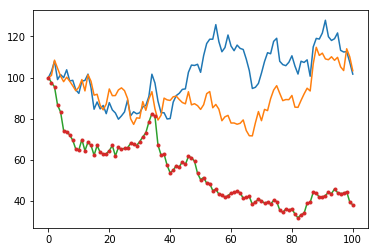

In [25]:
# MCPath for the min of 3 names (S1=100, S2=100, S3=100, s1, s2, s3, rho1, rho2, T, r, dt)
def PathsMin(S1, S2, S3, s1, s2, s3, rho12, rho13, rho23, T, r, dt = 1/252):
    n = int(round(T/dt,0))
    s1,s2,s3 = MCCorrV(0,0,0,0.5,0.5,0.5,s1,s2,s3,n)
    r_dt = r * dt
    s1_sqrt_dt = s1 * np.sqrt(dt)
    s2_sqrt_dt = s2 * np.sqrt(dt)
    s3_sqrt_dt = s3 * np.sqrt(dt)
    sims1 = np.zeros(n+1)
    sims2 = np.zeros(n+1)
    sims3 = np.zeros(n+1)
    simsm = np.zeros(n+1)
    sims1[0] = S1
    sims2[0] = S2
    sims3[0] = S3
    simsm[0]  = 100
    for i in range(n):
        sims1[i+1] = sims1[i] * (1+(r_dt + s1_sqrt_dt[i]))
        sims2[i+1] = sims2[i] * (1+(r_dt + s2_sqrt_dt[i]))
        sims3[i+1] = sims3[i] * (1+(r_dt + s3_sqrt_dt[i]))
        simsm[i+1] = min(sims1[i+1],sims2[i+1],sims3[i+1])
    return sims1, sims2, sims3, simsm

w,y,z,m = PathsMin(100,100,100,0.5,0.5,0.5, 0, 0, 0, 1, 0, 0.01)
plt.plot(w)
plt.plot(y)
plt.plot(z)
plt.plot(m, '.')




In [34]:
#one draw for the put price of the worst of 3
def WOP1(S1, S2, S3, s1, s2, s3, rho12, rho13, rho23, T, r, K, dt = 1/252):
    w,y,z,m = PathsMin(S1, S2, S3, s1, s2, s3, rho12, rho13, rho23, T, r, dt = 1/252)
    n = int(round(T/dt,0))
    p = max(K-m[n],0)
    p = p*np.exp(-r*T)
    return p

p = WOP1(100,100,100,0.5,0.5,0.5, 0, 0, 0, 1, 0, 100, 0.1)
print(p)



3.1595439829726075


In [90]:
#put price for worst of three
def WOP(S1, S2, S3, s1, s2, s3, rho12, rho13, rho23, T, r, K, dt = 1/252, n = 1000):
    p = 0
    for i in range(0,n): 
        p += WOP1(S1, S2, S3, s1, s2, s3, rho12, rho13, rho23, T, r, K, dt = 1/252)
    return p/n

p = WOP(100,100,100,0.2,0.2,0.2, 0, 0, 0, 1, 0, 100, 0.01, 1000)
print(p)



14.059417992465391


In [94]:
# %vega of one name on for worst of three
def Vega(S1, S2, S3, s1, s2, s3, rho12, rho13, rho23, T, r, K, dt = 1/252, n = 1000, x=1):
    if x == 1:
        a=1
        b=0
        c=0
    if x == 2:
        a=0
        b=1
        c=0
    if x == 3:
        a=0
        b=0
        c=1        
    p1 = WOP(S1, S2, S3, s1, s2, s3, rho12, rho13, rho23, T, r, K, dt = dt, n = n)
    p2= WOP(S1, S2, S3, s1+0.01, s2+0.01, s3+0.01, rho12, rho13, rho23, T, r, K, dt = dt, n = n)
    vega = p2 - p1
    return vega

vega = Vega(100,100,100,0.2,0.2,0.2, 1, 1, 1, 1, 0, 100, 0.01, 10000,1)

print(vega)


0.7080980925968738


In [ ]:
# $-vega of one name on for worst of three